In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11744604,Guardians of Life,2020,3.0
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN


In [3]:
type(dfMovies)

pandas.core.frame.DataFrame

In [56]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year', 'movie_count']
#dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
101,2016,15
102,2017,22
103,2018,20
104,2019,28


In [5]:
# le résultat n'est pas fameux
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'name': 'Alfred Hitchcock', 'birthdate': '189...",60
1,"{'name': 'Martin Scorsese', 'birthdate': '1942...",48
2,"{'name': 'Steven Spielberg', 'birthdate': '194...",41
3,"{'name': 'Clint Eastwood', 'birthdate': '1930-...",39
4,"{'name': 'Brian De Palma', 'birthdate': '1940-...",38
5,"{'name': 'Ridley Scott', 'birthdate': '1937-11...",35
6,"{'name': 'John Woo', 'birthdate': '1946-09-22'...",34
7,"{'name': 'Steve McQueen', 'birthdate': '1969-1...",31
8,"{'name': 'Sam Raimi', 'birthdate': '1959-10-23...",31
9,"{'name': 'John Ford', 'birthdate': None, 'id':...",20


In [6]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [7]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [8]:
data_json = response.json()
data_json

[[{'name': 'Alfred Hitchcock', 'birthdate': '1899-08-13', 'id': 33}, 60],
 [{'name': 'Martin Scorsese', 'birthdate': '1942-11-17', 'id': 217}, 48],
 [{'name': 'Steven Spielberg', 'birthdate': '1946-12-18', 'id': 229}, 41],
 [{'name': 'Clint Eastwood', 'birthdate': '1930-05-31', 'id': 142}, 39],
 [{'name': 'Brian De Palma', 'birthdate': '1940-09-11', 'id': 361}, 38],
 [{'name': 'Ridley Scott', 'birthdate': '1937-11-30', 'id': 631}, 35],
 [{'name': 'John Woo', 'birthdate': '1946-09-22', 'id': 247}, 34],
 [{'name': 'Steve McQueen', 'birthdate': '1969-10-09', 'id': 2588606}, 31],
 [{'name': 'Sam Raimi', 'birthdate': '1959-10-23', 'id': 600}, 31],
 [{'name': 'John Ford', 'birthdate': None, 'id': 406}, 20],
 [{'name': 'Peter Jackson', 'birthdate': '1961-10-31', 'id': 1392}, 19],
 [{'name': 'Danny Boyle', 'birthdate': '1956-10-20', 'id': 965}, 18],
 [{'name': 'Quentin Tarantino', 'birthdate': '1963-03-27', 'id': 233}, 14],
 [{'name': 'Walter Edwards', 'birthdate': None, 'id': 250445}, 14],
 [

In [9]:
# applatir en liste de tuples
data_flatten = [ (director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count )  
         for director_dict, movie_count in data_json ]
data_flatten

[(33, 'Alfred Hitchcock', '1899-08-13', 60),
 (217, 'Martin Scorsese', '1942-11-17', 48),
 (229, 'Steven Spielberg', '1946-12-18', 41),
 (142, 'Clint Eastwood', '1930-05-31', 39),
 (361, 'Brian De Palma', '1940-09-11', 38),
 (631, 'Ridley Scott', '1937-11-30', 35),
 (247, 'John Woo', '1946-09-22', 34),
 (2588606, 'Steve McQueen', '1969-10-09', 31),
 (600, 'Sam Raimi', '1959-10-23', 31),
 (406, 'John Ford', None, 20),
 (1392, 'Peter Jackson', '1961-10-31', 19),
 (965, 'Danny Boyle', '1956-10-20', 18),
 (233, 'Quentin Tarantino', '1963-03-27', 14),
 (250445, 'Walter Edwards', None, 14),
 (116, 'James Cameron', '1954-08-16', 14),
 (102908, 'Robert N. Bradbury', None, 13),
 (634240, 'Christopher Nolan', '1970-07-30', 13),
 (1053, 'Ethan Coen', '1957-09-21', 12),
 (94435, 'Bong Joon Ho', '1969-09-14', 12),
 (1054, 'Joel Coen', '1954-11-29', 11)]

In [10]:
# applatir en list de dicts
data_flatten = [ {**director_dict, 'movie_count': movie_count }  
         for director_dict, movie_count in data_json ]
data_flatten

[{'name': 'Alfred Hitchcock',
  'birthdate': '1899-08-13',
  'id': 33,
  'movie_count': 60},
 {'name': 'Martin Scorsese',
  'birthdate': '1942-11-17',
  'id': 217,
  'movie_count': 48},
 {'name': 'Steven Spielberg',
  'birthdate': '1946-12-18',
  'id': 229,
  'movie_count': 41},
 {'name': 'Clint Eastwood',
  'birthdate': '1930-05-31',
  'id': 142,
  'movie_count': 39},
 {'name': 'Brian De Palma',
  'birthdate': '1940-09-11',
  'id': 361,
  'movie_count': 38},
 {'name': 'Ridley Scott',
  'birthdate': '1937-11-30',
  'id': 631,
  'movie_count': 35},
 {'name': 'John Woo', 'birthdate': '1946-09-22', 'id': 247, 'movie_count': 34},
 {'name': 'Steve McQueen',
  'birthdate': '1969-10-09',
  'id': 2588606,
  'movie_count': 31},
 {'name': 'Sam Raimi',
  'birthdate': '1959-10-23',
  'id': 600,
  'movie_count': 31},
 {'name': 'John Ford', 'birthdate': None, 'id': 406, 'movie_count': 20},
 {'name': 'Peter Jackson',
  'birthdate': '1961-10-31',
  'id': 1392,
  'movie_count': 19},
 {'name': 'Danny Bo

In [11]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [12]:
dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [13]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [14]:
pd.to_datetime('1899-08-13')

Timestamp('1899-08-13 00:00:00')

In [15]:
dfStatsMovieByDirector[dfStatsMovieByDirector.birthdate.isnull()]

,name,birthdate,movie_count
id,,,
406,John Ford,None,20
250445,Walter Edwards,None,14
102908,Robert N. Bradbury,None,13


In [16]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(pd.to_datetime)

id
33        1899-08-13
217       1942-11-17
229       1946-12-18
142       1930-05-31
361       1940-09-11
631       1937-11-30
247       1946-09-22
2588606   1969-10-09
600       1959-10-23
1392      1961-10-31
965       1956-10-20
233       1963-03-27
116       1954-08-16
634240    1970-07-30
1053      1957-09-21
94435     1969-09-14
1054      1954-11-29
Name: birthdate, dtype: datetime64[ns]

In [17]:
# def fromisoformat_or_none(dt):
#    return date.fromisoformat(bd) if bd is not None else None

dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(
    lambda bd: pd.to_datetime(bd) if bd is not None else None)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [18]:
dfStatsMovieByDirector.loc[33].birthdate

Timestamp('1899-08-13 00:00:00')

In [19]:
# other idea: instead of apply read column birthdate as datetime64 (NaT)
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


## Graphiques avec matplotlib

<AxesSubplot:xlabel='name'>

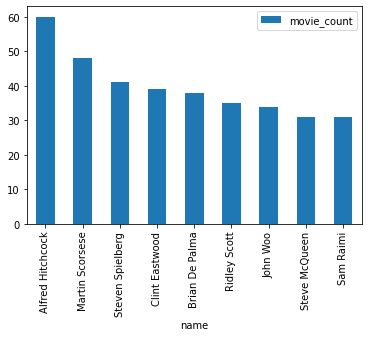

In [20]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

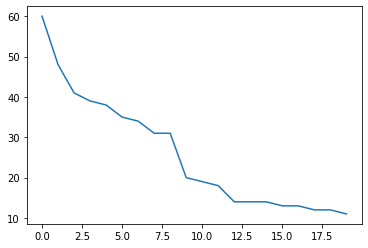

In [21]:
# 1 methode par type de graphe : plot, bar, piechart, ...
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values
plt.plot(movie_count_ndarray)


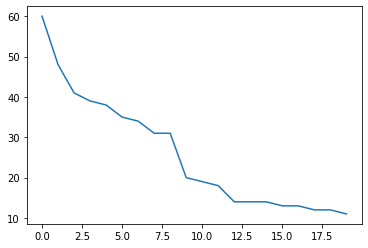

In [22]:
# fig : l'ensemble du dessin
# ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5, 1.0, 'diag bar')

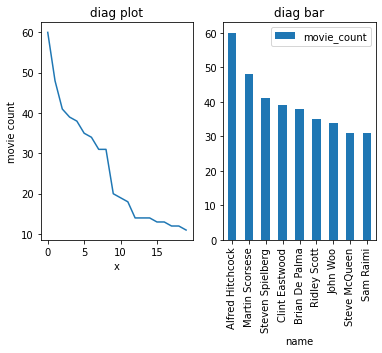

In [23]:
# fig : l'ensemble du dessin
# ax1, ax2 : 2 tracés
fig, (ax1, ax2) = plt.subplots(1,2)
# NB: fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

# tracé 1 sur ax1
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title('diag plot')
# tracé 2 sur ax2
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title('diag bar')


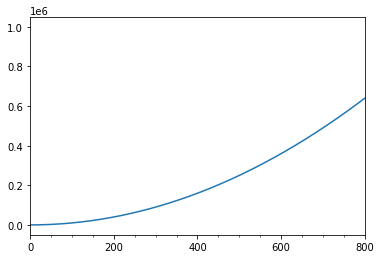

In [24]:
x = np.arange(1000)
y = x**2+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0, 800)
# graduation majeure sur l'axe des x (x axis)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
# graduation mineure sur l'axe des x (x axis)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

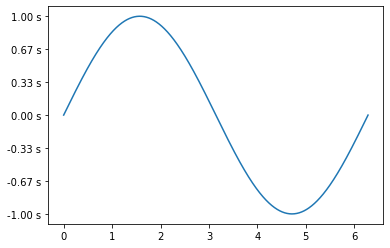

In [25]:
x = np.linspace(0,2*np.pi, 1000)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
# graduation majeure sur l'axe des y (y axis)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
# formattage des labels sur la graduation
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
# graduation mineure sur l'axe des y (y axis)
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

In [26]:
np.linspace?

# TP

In [41]:
dfCountStarByYear = dfStars[~dfStars.birthdate.isna()].groupby(pd.Grouper(key='birthdate', freq='1Y')).count()
dfCountStarByYear = dfCountStarByYear.loc[dfCountStarByYear.name > 0]
dfCountStarByYear

,name
birthdate,
1879-12-31,1
1880-12-31,1
1881-12-31,1
1884-12-31,1
1892-12-31,2
...,...
1978-12-31,1
1979-12-31,2
1980-12-31,1


In [40]:
dfCountMoviesByYear = dfMovies.groupby(pd.Grouper(key='year')).count()[['title']]
dfCountMoviesByYear

,title
year,
1915,1
1916,1
1917,7
1918,10
1919,10
...,...
2019,28
2015,30
2017,22


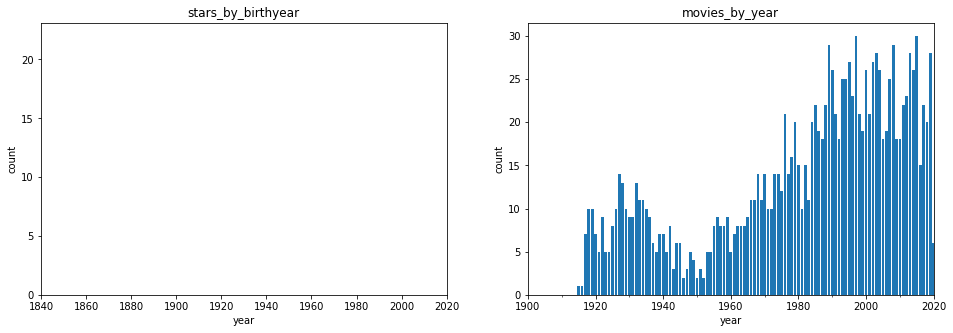

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.bar(dfCountStarByYear.index, dfCountStarByYear.name)
ax1.set_title('stars_by_birthyear')
ax1.set_xlabel('year')
ax1.set_ylabel('count')
ax1.set_xlim(datetime(1840,1,1), datetime(2020,1,1))

ax2.bar(dfCountMoviesByYear.index, dfCountMoviesByYear.title)
ax2.set_title("movies_by_year")
ax2.set_xlabel("year")
ax2.set_ylabel("count")
ax2.set_xlim(1900, 2020)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))

In [61]:
dfStatsMovieByActor = pd.read_json(f'http://localhost:8000/stars/stats_by_actor')
dfStatsMovieByActor

,actor,movie_count,first_movie_year,last_movie_year
0,"{'name': 'John Wayne', 'birthdate': '1907-05-2...",172,1926,1976
1,"{'name': 'Harrison Ford', 'birthdate': '1884-0...",86,1915,1932
2,"{'name': 'Sylvester Stallone', 'birthdate': '1...",73,1969,2019
3,"{'name': 'Sean Connery', 'birthdate': '1930-08...",73,1954,2012
4,"{'name': 'Tom Hanks', 'birthdate': '1956-07-09...",69,1980,2020
...,...,...,...,...
161,"{'name': 'John Cameron', 'birthdate': None, 'i...",10,1976,1995
162,"{'name': 'Matt Damon', 'birthdate': '1970-01-0...",10,1998,2015
163,"{'name': 'Jack Evans', 'birthdate': '1893-01-0...",10,1932,1935
164,"{'name': 'Michael Fassbender', 'birthdate': '1...",10,2001,2017


In [80]:
response = requests.get('http://localhost:8000/stars/stats_by_actor')
response

<Response [200]>

In [81]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [82]:
data_json = response.json()
data_json

[[{'name': 'John Wayne', 'birthdate': '1907-05-26', 'id': 78},
  172,
  1926,
  1976],
 [{'name': 'Harrison Ford', 'birthdate': '1884-03-16', 'id': 1230},
  86,
  1915,
  1932],
 [{'name': 'Sylvester Stallone', 'birthdate': '1946-07-06', 'id': 230},
  73,
  1969,
  2019],
 [{'name': 'Sean Connery', 'birthdate': '1930-08-25', 'id': 125},
  73,
  1954,
  2012],
 [{'name': 'Tom Hanks', 'birthdate': '1956-07-09', 'id': 158}, 69, 1980, 2020],
 [{'name': 'Jean-Claude Van Damme', 'birthdate': '1960-10-18', 'id': 241},
  66,
  1979,
  2019],
 [{'name': 'Clint Eastwood', 'birthdate': '1930-05-31', 'id': 142},
  63,
  1955,
  2018],
 [{'name': 'Harrison Ford', 'birthdate': '1942-07-13', 'id': 148},
  63,
  1966,
  2020],
 [{'name': 'Arnold Schwarzenegger', 'birthdate': '1947-07-30', 'id': 216},
  56,
  1970,
  2019],
 [{'name': 'Will Smith', 'birthdate': '1968-09-25', 'id': 226},
  50,
  1988,
  2020],
 [{'name': 'Martin Scorsese', 'birthdate': '1942-11-17', 'id': 217},
  41,
  1967,
  2019],
 [

In [87]:
# applatir en liste de tuples
data_flatten = [ (actor_dict['name'], actor_dict['birthdate'], actor_dict['id'], movie_count,
                  first_movie_year, last_movie_year )  
         for actor_dict, movie_count, first_movie_year, last_movie_year in data_json ]
data_flatten

[('John Wayne', '1907-05-26', 78, 172, 1926, 1976),
 ('Harrison Ford', '1884-03-16', 1230, 86, 1915, 1932),
 ('Sylvester Stallone', '1946-07-06', 230, 73, 1969, 2019),
 ('Sean Connery', '1930-08-25', 125, 73, 1954, 2012),
 ('Tom Hanks', '1956-07-09', 158, 69, 1980, 2020),
 ('Jean-Claude Van Damme', '1960-10-18', 241, 66, 1979, 2019),
 ('Clint Eastwood', '1930-05-31', 142, 63, 1955, 2018),
 ('Harrison Ford', '1942-07-13', 148, 63, 1966, 2020),
 ('Arnold Schwarzenegger', '1947-07-30', 216, 56, 1970, 2019),
 ('Will Smith', '1968-09-25', 226, 50, 1988, 2020),
 ('Martin Scorsese', '1942-11-17', 217, 41, 1967, 2019),
 ('Alfred Hitchcock', '1899-08-13', 33, 39, 1927, 1976),
 ('Joaquin Phoenix', '1974-10-28', 1618, 38, 1986, 2020),
 ('Vin Diesel', '1967-07-18', 4874, 38, 1990, 2020),
 ('Arnold Montey', None, 7419291, 33, 1994, 2018),
 ('Paul Fix', '1901-01-01', 280707, 32, 1931, 1973),
 ('Yakima Canutt', '1895-01-01', 134831, 31, 1932, 1959),
 ('Quentin Tarantino', '1963-03-27', 233, 31, 1983,

In [90]:
# applatir en list de dicts
data_flatten = [ {**actor_dict, 'movie_count': movie_count }  
         for actor_dict, movie_count, first_movie_year, last_movie_year in data_json ]
data_flatten

[{'name': 'John Wayne',
  'birthdate': '1907-05-26',
  'id': 78,
  'movie_count': 172},
 {'name': 'Harrison Ford',
  'birthdate': '1884-03-16',
  'id': 1230,
  'movie_count': 86},
 {'name': 'Sylvester Stallone',
  'birthdate': '1946-07-06',
  'id': 230,
  'movie_count': 73},
 {'name': 'Sean Connery',
  'birthdate': '1930-08-25',
  'id': 125,
  'movie_count': 73},
 {'name': 'Tom Hanks',
  'birthdate': '1956-07-09',
  'id': 158,
  'movie_count': 69},
 {'name': 'Jean-Claude Van Damme',
  'birthdate': '1960-10-18',
  'id': 241,
  'movie_count': 66},
 {'name': 'Clint Eastwood',
  'birthdate': '1930-05-31',
  'id': 142,
  'movie_count': 63},
 {'name': 'Harrison Ford',
  'birthdate': '1942-07-13',
  'id': 148,
  'movie_count': 63},
 {'name': 'Arnold Schwarzenegger',
  'birthdate': '1947-07-30',
  'id': 216,
  'movie_count': 56},
 {'name': 'Will Smith',
  'birthdate': '1968-09-25',
  'id': 226,
  'movie_count': 50},
 {'name': 'Martin Scorsese',
  'birthdate': '1942-11-17',
  'id': 217,
  'movi

In [91]:
dfStatsMovieByActor = pd.DataFrame(data_flatten)
dfStatsMovieByActor.set_index('id', inplace=True)
dfStatsMovieByActor

,name,birthdate,movie_count
id,,,
78,John Wayne,1907-05-26,172
1230,Harrison Ford,1884-03-16,86
230,Sylvester Stallone,1946-07-06,73
125,Sean Connery,1930-08-25,73
158,Tom Hanks,1956-07-09,69
...,...,...,...
354,Matt Damon,1970-01-01,10
262846,Jack Evans,1893-01-01,10
621,Kurt Russell,1951-01-01,10


Text(0.5, 1.0, 'Diagramme bar')

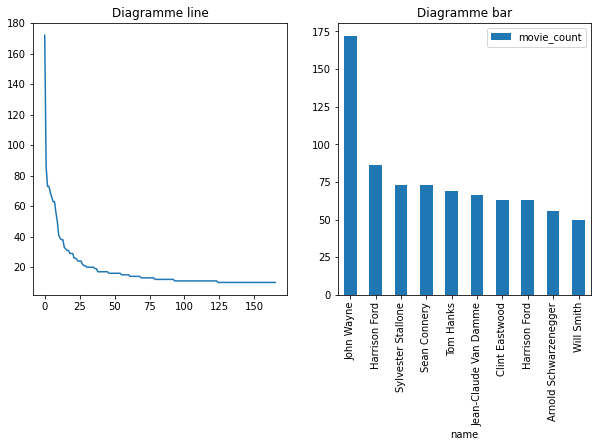

In [105]:
statsToPlot = dfStatsMovieByActor[dfStatsMovieByActor.movie_count > 45][['name','movie_count']] \
    .set_index('name')

movie_count_ndarray = dfStatsMovieByActor.movie_count.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(movie_count_ndarray)
statsToPlot.plot(kind='bar', ax=ax2)

ax1.set_title("Diagramme line")
ax2.set_title("Diagramme bar")